In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dir = 'C:/Users/Admin/Downloads/archive (2)/dogscats/train'

In [3]:
categories = ['cats', 'dogs']

In [4]:
data = []

In [5]:
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)
        try:
            pet_img = cv2.resize(pet_img, (50,50))
            image = np.array(pet_img).flatten()
    
            data.append([image, label])
        except Exception as e:
            pass

In [6]:
pick_in = open('data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [7]:
pick_in = open('data1.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [8]:
random.shuffle(data)
features = []
labels = []

In [9]:
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.01)

In [ ]:
model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

In [14]:
pick = open('model.sav', 'wb')
pickle.dump(model, pick)
pick.close()

In [15]:
pick = open('model.sav', 'rb')
model = pickle.load(pick)
pick.close()

In [16]:
prediction = model.predict(xtest)

In [17]:
accuracy = model.score(xtest, ytest)

In [18]:
categories = ['cats', 'dogs']

In [19]:
print('Accuracy:', accuracy)

Accuracy: 1.0


In [20]:
print('Prediction is :', categories[prediction[0]])

Prediction is : dogs


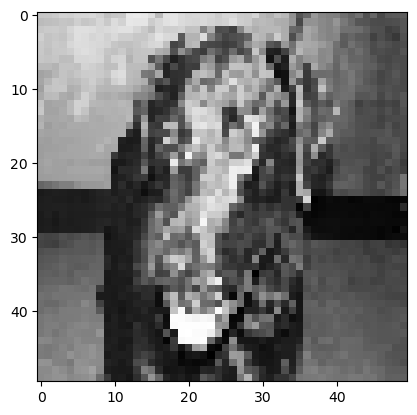

In [21]:
mypet = xtest[0].reshape(50,50)
plt.imshow(mypet, cmap='gray')
plt.show()